In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import torch

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from detectron2.data.datasets import register_coco_instances

In [2]:
import sys
sys.path.insert(0, "/Users/giakhang/dev/work/sand_box/hope_to_public_net")

# Evaluate on validation set

In [3]:
dataset = 'coco2017'
annot_dir = '../coco2017/annotations'
imgs_dir = '../coco2017/{}2017'

#annot_dir = './coco_test_annotations'
#imgs_dir = './coco_test2017'

for split in ['train', 'val']:
    annot_path = os.path.join(annot_dir, f'instances_{split}2017.json')
    d_name = dataset + f'_{split}'
    register_coco_instances(d_name, {}, annot_path, imgs_dir.format(split))


#annot_path = os.path.join(annot_dir, 'image_info_test-dev2017.json')
#register_coco_instances('coco2017_test-dev', {}, annot_path, imgs_dir)

# Load dataset
dataset_dicts = DatasetCatalog.get('coco2017_val')
metadata = MetadataCatalog.get('coco2017_val')

[06/01 10:23:09 d2.data.datasets.coco]: Loaded 5000 images in COCO format from ../coco2017/annotations/instances_val2017.json


In [4]:
from detectron2.model_zoo import get_config
from detectron2.config import LazyConfig
from detectron2.config.instantiate import instantiate
from detectron2.engine import DefaultPredictor

cfg = LazyConfig.load("/Users/giakhang/dev/work/sand_box/hope_to_public_net/khang_net/configs/huflit_net/huflitnet_r_50_se_3x.py")

cfg.train.device = 'cpu'
cfg.dataloader.evaluator.dataset_name = 'coco2017_val'
cfg.dataloader.train.dataset.names = 'coco2017_val'
cfg.dataloader.test.dataset.names = 'coco2017_val'
cfg.dataloader.train.total_batch_size = 16

cfg.model.num_classes = 80
cfg.model.yolof.num_classes = 80
cfg.model.mask_head.num_classes = 80
#cfg.model.yolof.score_thresh_test = 0.7
#cfg.model.yolof.max_detections_per_image = 50

cfg.train.init_checkpoint = "/Users/giakhang/Downloads/coco_huflit_net_ckpts/output_huflitnet_r_50_se_3x_train_val/model_final.pth"

In [5]:
model = instantiate(cfg.model)

In [6]:
params = model.parameters()

In [7]:
total_params = sum(p.numel() for p in params)
print("Total parameters:", total_params)

Total parameters: 49846812


In [ ]:
from detectron2.evaluation import inference_on_dataset

inference_on_dataset(
            model,
            instantiate(cfg.dataloader.test),
            instantiate(cfg.dataloader.evaluator),
)

[06/01 10:23:17 d2.data.datasets.coco]: Loaded 5000 images in COCO format from ../coco2017/annotations/instances_val2017.json
[06/01 10:23:17 d2.data.build]: Distribution of instances among all 80 categories:
|   category    | #instances   |   category   | #instances   |   category    | #instances   |
|:-------------:|:-------------|:------------:|:-------------|:-------------:|:-------------|
|    person     | 10777        |   bicycle    | 314          |      car      | 1918         |
|  motorcycle   | 367          |   airplane   | 143          |      bus      | 283          |
|     train     | 190          |    truck     | 414          |     boat      | 424          |
| traffic light | 634          | fire hydrant | 101          |   stop sign   | 75           |
| parking meter | 60           |    bench     | 411          |     bird      | 427          |
|      cat      | 202          |     dog      | 218          |     horse     | 272          |
|     sheep     | 354          |     co

/Users/giakhang/miniconda3/envs/hope_to_public_net/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1708025539291/work/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/01 10:23:58 d2.evaluation.evaluator]: Inference done 11/5000. Dataloading: 0.0005 s/iter. Inference: 3.4197 s/iter. Eval: 0.0288 s/iter. Total: 3.4490 s/iter. ETA=4:46:47
[06/01 10:24:05 d2.evaluation.evaluator]: Inference done 13/5000. Dataloading: 0.0005 s/iter. Inference: 3.4391 s/iter. Eval: 0.0277 s/iter. Total: 3.4675 s/iter. ETA=4:48:12
[06/01 10:24:13 d2.evaluation.evaluator]: Inference done 15/5000. Dataloading: 0.0006 s/iter. Inference: 3.5285 s/iter. Eval: 0.0315 s/iter. Total: 3.5610 s/iter. ETA=4:55:51


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import glob
from PIL import Image

# Assuming you have a list of image file paths
image_paths = glob.glob("/Users/giakhang/dev/work/sand_box/hope_to_public_net/coco2017/val2017/*")

# Randomly select 10 images from the list
selected_images = random.sample(image_paths, 10)

# Create a figure with 2 rows and 5 columns
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for ax, img_path in zip(axs, selected_images):
    # Open and display the image
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import torch

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from detectron2.data.datasets import register_coco_instances

In [4]:
dataset = 'coco2017'
annot_dir = '../coco2017/annotations'
imgs_dir = '../coco2017/{}2017'

for split in ['train', 'val']:
    #if split == 'train':
        #annot_path = 'cityscapes/annotations/instancesonly_filtered_gtFine_train_temp.json'
    #else:
    annot_path = os.path.join(annot_dir, f'instances_{split}2017.json')
    d_name = dataset + f'_{split}'
    register_coco_instances(d_name, {}, annot_path, imgs_dir.format(split))

# Load dataset
dataset_dicts = DatasetCatalog.get('coco2017_val')
metadata = MetadataCatalog.get('coco2017_val')

[06/01 10:54:07 d2.data.datasets.coco]: Loaded 5000 images in COCO format from ../coco2017/annotations/instances_val2017.json


In [5]:
from detectron2.model_zoo import get_config
from detectron2.config import LazyConfig
from detectron2.config.instantiate import instantiate
from detectron2.engine import DefaultPredictor

cfg = LazyConfig.load("../khang_net/configs/huflit_net/huflitnet_r_50_se_3x.py")

cfg.train.device = 'cpu'
cfg.dataloader.evaluator.dataset_name = 'coco2017_val'
cfg.dataloader.train.dataset.names = 'coco2017_train'
cfg.dataloader.test.dataset.names = 'coco2017_val'
cfg.dataloader.train.total_batch_size = 16

cfg.model.num_classes = 80
cfg.model.yolof.num_classes = 80
cfg.model.mask_head.num_classes = 80

cfg.train.init_checkpoint = "/Users/giakhang/Downloads/huflitnet/coco_huflitnet_ckpts/output_huflitnet_r_50_se_3x_train_val/model_final.pth"

In [6]:
from khang_net.engine.default_predictor import DefaultPredictor

predictor = DefaultPredictor(cfg)
predictor.model.yolof.score_threshold = 0.4

[06/01 10:54:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /Users/giakhang/Downloads/huflitnet/coco_huflitnet_ckpts/output_huflitnet_r_50_se_3x_train_val/model_final.pth ...


In [7]:
annType = ['segm','bbox','keypoints']
annType = annType[0]      #specify type here

/Users/giakhang/miniconda3/envs/hope_to_public_net/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1708025539291/work/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


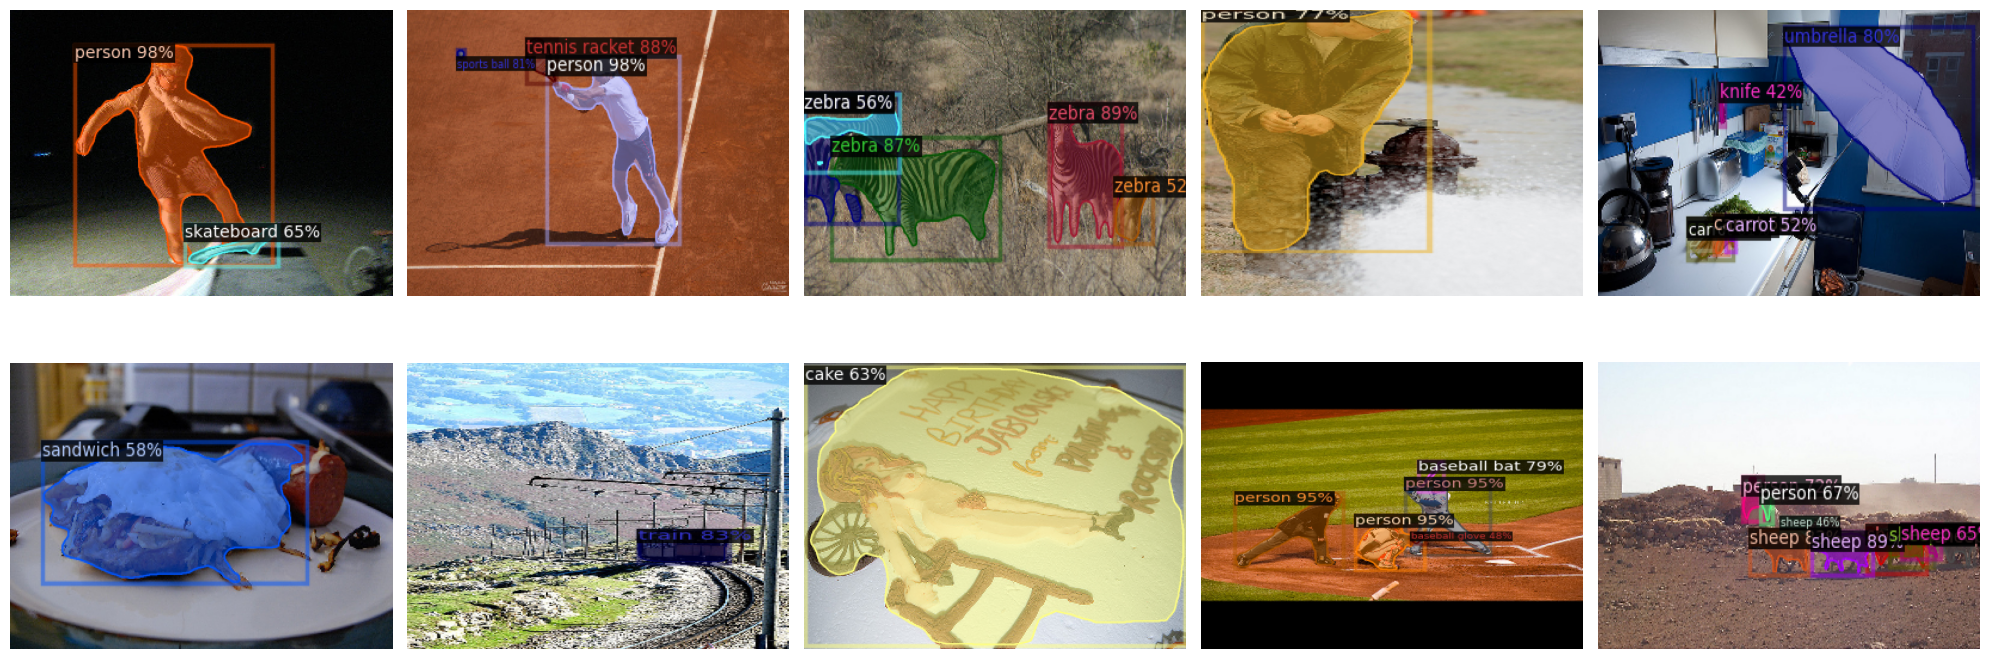

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
import glob
import cv2


# Assuming you have a list of image file paths
image_paths = glob.glob("/Users/giakhang/Downloads/coco_test2017/*")

# Randomly select 10 images from the list
selected_images = random.sample(image_paths, 10)

# Create a figure with 2 rows and 5 columns
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for ax, img_path in zip(axs, selected_images):
    # Open and display the image
    #img = Image.open(img_path)
    #ax.imshow(img)
    #ax.axis('off')  # Hide axes
    im = cv2.imread(img_path)
    predictions = predictor(im)
    v = Visualizer(im[:, :, ::-1],
               scale=0.5, 
               metadata=MetadataCatalog.get("coco2017_val")
               #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(predictions["instances"].to("cpu"))
    img_resized = cv2.resize(out.get_image(), (640, 480), interpolation=cv2.INTER_AREA)

    ax.imshow(img_resized)
    ax.axis('off')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()